In [4]:
%matplotlib inline

import pandas as pd
import os
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats.mstats import gmean

import math

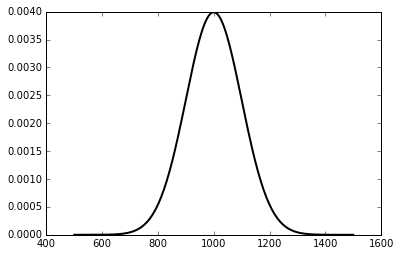

In [6]:
#
# let's do a little experiment with normal distributions
# 

# 
# consider a normal distribution with mean 1000 and standard deviation 100
#

mu = 1000
std = 100

x = np.linspace(500,1500,200)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


In [23]:
#
# now let's draw some random samples of different sizes from this distribution
# and look at how their mean values differ
# 

# 
# let's vary the sample size from 1 to 25
# and do 1000 trials for each sample size
#

mu = 1000
std = 100

trials = 10000

meandiffs = {}

for s in range (1,26):
    meandiffs[s] = []
    for t in range(0,trials):
        s1 = norm.rvs(mu, std, size=s)
        s2 = norm.rvs(mu, std, size=s)
        meandiffs[s].append(s1.mean() - s2.mean())



(array([   3.,   14.,   54.,  156.,  270.,  257.,  157.,   68.,   14.,    7.]),
 array([-203.06827971, -163.00154669, -122.93481367,  -82.86808066,
         -42.80134764,   -2.73461462,   37.3321184 ,   77.39885142,
         117.46558444,  157.53231746,  197.59905047]),
 <a list of 10 Patch objects>)

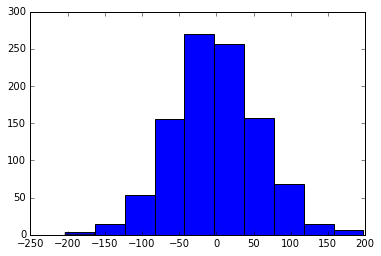

In [19]:
plt.hist(meandiffs[6])

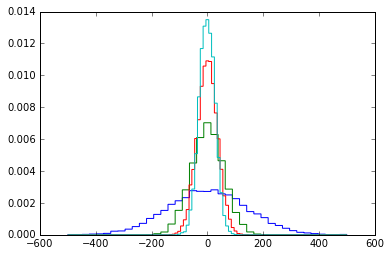

In [26]:
n, x, _ = plt.hist(meandiffs[1], bins=np.linspace(-500,500,40),histtype=u'step', normed=True)
n, x, _ = plt.hist(meandiffs[6], bins=np.linspace(-500,500,40),histtype=u'step', normed=True)
n, x, _ = plt.hist(meandiffs[15], bins=np.linspace(-500,500,100),histtype=u'step', normed=True)
n, x, _ = plt.hist(meandiffs[25], bins=np.linspace(-500,500,100),histtype=u'step', normed=True)

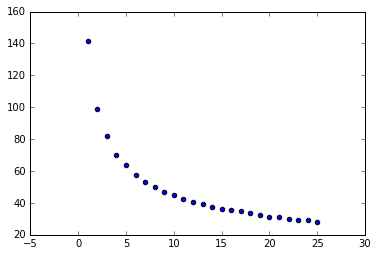

In [31]:
x = []
y = []

for s in range (1,26):
    x.append(s)
    mu, std = norm.fit(meandiffs[s])
    y.append(std)
    
plt.scatter(x,y)

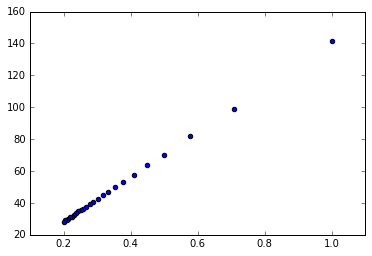

In [33]:
x = []
y = []
z = []

for s in range (1,26):
    x.append(s)
    mu, std = norm.fit(meandiffs[s])
    y.append(std)
    z.append(math.sqrt(1/s))
    
plt.scatter(z,y)

In [39]:
norm.ppf(.95)

1.6448536269514722

In [42]:
dist = norm(1000,100)
print (dist.ppf(.95))

1164.4853627


In [35]:
norm.ppf(.05)

-1.6448536269514729

In [36]:
norm.ppf(.001)

-3.0902323061678132

In [37]:
norm.ppf(.999)

3.0902323061678132